In [30]:
import pydataset
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# data acquisition

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables



In [ ]:
df_iris = pydataset.data('iris')

In [ ]:
df_iris.head(3)

In [ ]:
df_iris.shape

In [ ]:
df_iris.columns

In [ ]:
df_iris.dtypes

In [ ]:
df_iris.describe()



Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the column names that have a data type of object
- compute the range for each of the numeric variables.



In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/10wggtv3PSKYyRMgvTOJ6d9ksuw-FguyU_7yfishNlgk/edit#gid=1023018493'
export_sheet_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_sheet = pd.read_csv(export_sheet_url)
df_google_sheet

In [ ]:
df_google_sheets_sample = df_google_sheet.head(100)

In [ ]:
df_google_sheet.shape

In [ ]:
df_google_sheet.dtypes[df_google_sheet.dtypes=='object']
#alt from class
df_google_sheet.select_dtypes(include='object').columns

In [ ]:
df_google_sheet.describe().loc[['max', 'min']]

In [ ]:
df_google_sheet.describe().loc['max'] - df_google_sheet.describe().loc['min']



Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.



In [ ]:
df_excel = pd.read_excel('Table1_CustDetails.xlsx')

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
df_excel.shape

In [ ]:
df_excel.columns[:5]

In [ ]:
df_excel.dtypes[df_excel.dtypes=='object']

In [ ]:
df_excel.describe().loc[['max', 'min']]

In [ ]:
(df_excel.describe().loc['max'] - df_excel.describe().loc['min'])[['monthly_charges', 'total_charges', 'tenure']]

In [ ]:
#alt from class: make a transposed data frame
stats_excel = df_excel.describe().T
stats_excel['range'] = stats_excel['max'] - stats_excel['min']
stats_excel['range']



Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables



In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
export_sheet_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(export_sheet_url)
df_google

In [ ]:
df_google.shape

In [ ]:
df_google.columns

In [ ]:
df_google.dtypes

In [ ]:
df_google.describe()

In [ ]:
df_google[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].nunique()

In [ ]:
df_google.select_dtypes('object')

#### acquire file test

In [ ]:
import acquire

In [ ]:
acquire.get_titanic_data()

In [ ]:
acquire.get_iris_data()

In [ ]:
acquire.get_telco_data()

# data preperation

### iris data

1. Use the function defined in acquire.py to load the iris data. 

In [ ]:
iris = acquire.get_iris_data()
iris.head()

2. Drop the species_id and measurement_id columns. 

In [ ]:
iris.drop(columns = ['species_id', 'measurement_id', 'Unnamed: 0'], inplace = True)

3. Rename the species_name column to just species. 

In [ ]:
iris.rename(columns = {'species_name':'species'}, inplace=True)

4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [ ]:
dummy_df = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=True)
iris = pd.concat([iris, dummy_df], axis = 1)
iris.head()

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    df.drop(columns = ['species_id', 'measurement_id', 'Unnamed: 0'], inplace = True)
    df.rename(columns = {'species_name':'species'}, inplace=True)
    dummy_df = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=True)
    df = pd.concat([df, dummy_df], axis = 1)
    return df

iris = prep_iris(acquire.get_iris_data())
iris.head()

### titanic dataset

1. Use the function defined in acquire.py to load the Titanic data

In [ ]:
titanic = acquire.get_titanic_data()
titanic.head()

2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
titanic.drop(columns = ['Unnamed: 0', 'passenger_id', 'embarked', 'pclass', 'deck'], inplace= True)
titanic.rename(columns = {'class': 'pclass'}, inplace = True)
titanic.head()

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_df = pd.get_dummies(titanic[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])
titanic = pd.concat([titanic, dummy_df], axis = 1)
titanic.head()

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(df):
    '''
    cleans the titanic data 
    '''
    df.drop_duplicates(inplace=True)
    col_to_drop = ['Unnamed: 0','embarked', 'class', 'passenger_id', 'deck']
    df = df.drop(columns=col_to_drop)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])
    df = pd.concat([df, dummy_df], axis = 1)
    return df.drop(columns=['sex', 'embark_town'])

prep_titanic(acquire.get_titanic_data()).head()

### telco dataset

1. Use the function defined in acquire.py to load the Telco data. 

In [ ]:
telco = acquire.get_telco_data()
telco.head()

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
telco.info()

In [ ]:
telco.drop(columns = ['internet_service_type_id', 'contract_type_id', 'payment_type_id', 'Unnamed: 0'], inplace=True)

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
# get a list of the object columns, exclude customer_id because it is the foreign key
cat_cols = list(telco.select_dtypes('object').iloc[:,1:].columns)
cat_cols.remove('total_charges') #this data column will need to be changed to float
cat_cols

In [ ]:
dummy_df = pd.get_dummies(telco[cat_cols], dummy_na = False, drop_first = True)
telco = pd.concat([telco, dummy_df], axis = 1)
telco.head()

In [ ]:
# replace the ' ' values in the total_charges series with 0.  these customers have a tenure of 0; therefore 
# monthly_charges * 0 = 0
telco.total_charges[telco.total_charges == ' '] = telco.total_charges[telco.total_charges == ' '].replace(' ', 0, inplace=True)
telco.total_charges[telco.total_charges == ' ']

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco(df):
    df.drop(columns = ['internet_service_type_id', 'contract_type_id', 'payment_type_id', 'Unnamed: 0'], inplace=True)
    cat_cols = list(df.select_dtypes('object').iloc[:,1:].columns)
    cat_cols.remove('total_charges') #this data column will need to be changed to floatdummy_df = pd.get_dummies(telco[cat_cols], dummy_na = False, drop_first = True)
    dummy_df = pd.get_dummies(df[cat_cols], dummy_na = False, drop_first = True)
    df = pd.concat([df, dummy_df], axis = 1)
    #drop the empty total_charges rows
    df = df[df.total_charges != ' ']
    df.total_charges = df.total_charges.astype(float)
    return df

preped_telco = prep_telco(acquire.get_telco_data())
preped_telco.head().info()

In [ ]:
def split_telco_data(df):
    df = prep_telco(df)
    train, test = train_test_split(df, train_size = 0.8, stratify = df.churn)
    train, validate = train_test_split(train, train_size = 0.7, stratify = train.churn)
    return train, test, validate

train, test, validate = split_telco_data(acquire.get_telco_data())
train.head()

In [ ]:
import prepare
import acquire
telco_df = acquire.get_telco_data()
train, validate, test = prepare.split_telco_data(telco_df)
train.head()

# exploratory analysis

## iris_db

1. Acquire, prepare & split your data. 

In [5]:
import prepare
import acquire
i_train, i_validate, i_test = prepare.split_iris_data(acquire.get_iris_data())
i_train

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
59,5.2,2.7,3.9,1.4,versicolor,1,0
99,5.7,2.8,4.1,1.3,versicolor,1,0
94,5.6,2.7,4.2,1.3,versicolor,1,0
103,6.3,2.9,5.6,1.8,virginica,0,1
69,5.6,2.5,3.9,1.1,versicolor,1,0
...,...,...,...,...,...,...,...
58,6.6,2.9,4.6,1.3,versicolor,1,0
108,6.7,2.5,5.8,1.8,virginica,0,1
96,5.7,2.9,4.2,1.3,versicolor,1,0
139,6.9,3.1,5.4,2.1,virginica,0,1


2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
- Document takeaways & any actions.

In [10]:
i_train.describe().iloc[:,0:4]

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.848810,3.045238,3.786905,1.180952
std,0.881058,0.390984,1.825903,0.766698
min,4.300000,2.300000,1.100000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.425000,3.300000,5.400000,1.800000
max,7.700000,4.100000,6.900000,2.500000


Text(0.5, 1.0, 'sepal_length')

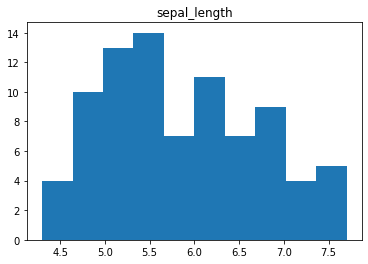

In [15]:
plt.hist(i_train.sepal_length)
plt.title('sepal_length')

Text(0.5, 1.0, 'sepal_width')

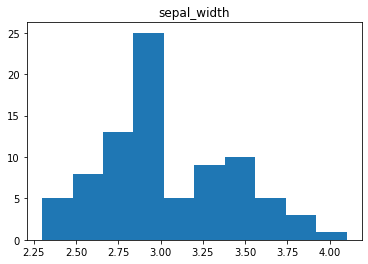

In [16]:
plt.hist(i_train.sepal_width)
plt.title('sepal_width')

Text(0.5, 1.0, 'petal_length')

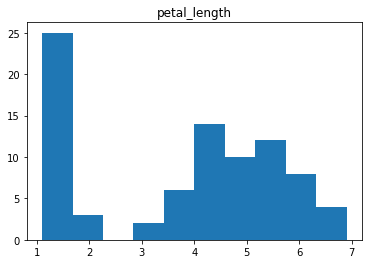

In [18]:
plt.hist(i_train.petal_length)
plt.title('petal_length')

Text(0.5, 1.0, 'petal_width')

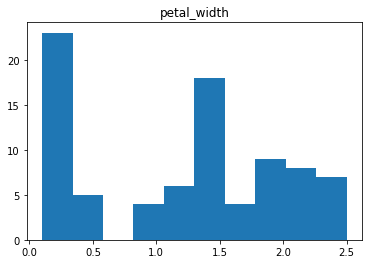

In [19]:
plt.hist(i_train.petal_width)
plt.title('petal_width')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

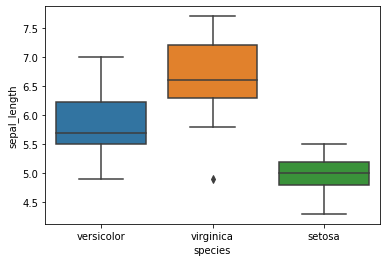

In [83]:
sns.boxplot(data = i_train, y= 'sepal_length', x = 'species')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

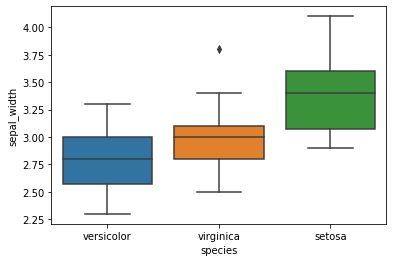

In [86]:
sns.boxplot(data = i_train, y = 'sepal_width', x = 'species')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

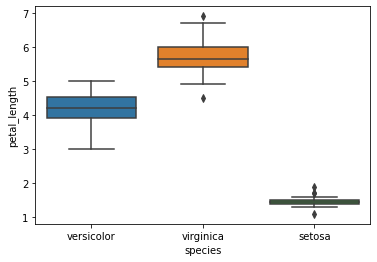

In [85]:
sns.boxplot(data = i_train, y= 'petal_length', x = 'species')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

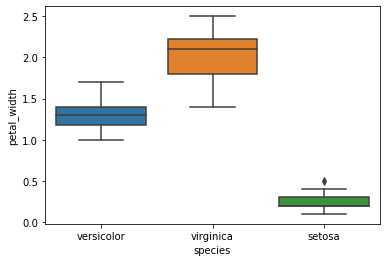

In [84]:
sns.boxplot(data = i_train, y= 'petal_width', x = 'species')

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [52]:
i_train.species.value_counts(), i_train.species.value_counts('normalize')

(versicolor    28
 virginica     28
 setosa        28
 Name: species, dtype: int64,
 versicolor    0.333333
 virginica     0.333333
 setosa        0.333333
 Name: species, dtype: float64)

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

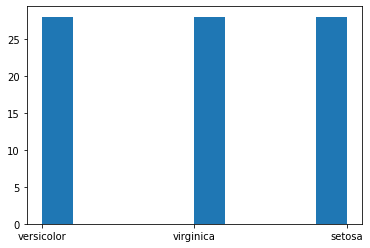

In [67]:
plt.hist(i_train.species)

sepal length and width are normal distributed

petal width and length are skewed right

3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.
- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
- Document takeaways & any actions

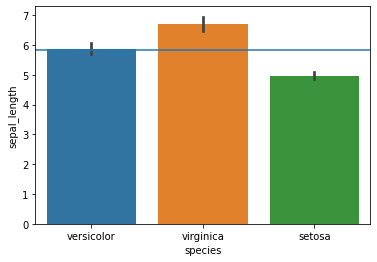

In [69]:
mean_val = i_train.sepal_length.mean()
sns.barplot(data=i_train, y='sepal_length', x='species')
plt.axhline(mean_val)

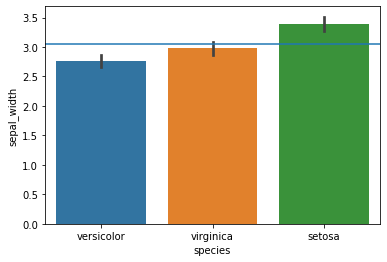

In [70]:
mean_val = i_train.sepal_width.mean()
sns.barplot(data=i_train, y='sepal_width', x='species')
plt.axhline(mean_val)

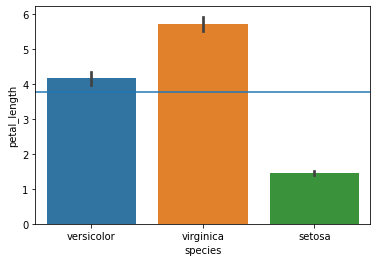

In [71]:
mean_val = i_train.petal_length.mean()
sns.barplot(data=i_train, y='petal_length', x='species')
plt.axhline(mean_val)

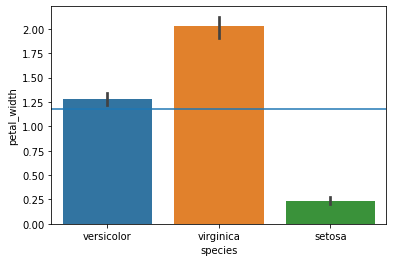

In [72]:
mean_val = i_train.petal_width.mean()
sns.barplot(data=i_train, y='petal_width', x='species')
plt.axhline(mean_val)

- For each measurement type, compute the descriptive statistics for each species.

In [75]:
i_train.groupby('species').describe().T.loc[:'petal_width']

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    4.975000    5.875000   6.696429
             std     0.329562    0.550168   0.661358
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.500000   6.300000
             50%     5.000000    5.700000   6.600000
             75%     5.200000    6.225000   7.200000
             max     5.500000    7.000000   7.700000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.392857    2.767857   2.975000
             std     0.320796    0.270875   0.288835
             min     2.900000    2.300000   2.500000
             25%     3.075000    2.575000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.600000    3.000000   3.100000
             max     4.100000    3.300000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.460714    4.171429   5.728571
             std     0.157149    0.485232   0.560329
             min     1.100000    3.000000   4.500000
             25%     1.400000    3.900000   5.400000
             50%     1.450000    4.200000   5.650000
             75%     1.500000    4.525000   6.000000
             max     1.900000    5.000000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.235714    1.282143   2.025000
             std     0.102611    0.182683   0.295177
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.175000   1.800000
             50%     0.200000    1.300000   2.100000
             75%     0.300000    1.400000   2.225000
             max     0.500000    1.700000   2.500000

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [82]:
alpha = 0.5
t, p = stats.mannwhitneyu(i_train[i_train.species == 'virginica'].petal_width, i_train[i_train.species == 'versicolor'].petal_width)
p < alpha

True

## telco_db

In [ ]:
import prepare
import acquire
telco_df = acquire.get_telco_data()
telco_train, validate, test = prepare.split_telco_data(telco_df)

In [ ]:
telco_train.head()

In [ ]:
#consider all the catagorical data and pair it with churn.  Do a χ^2 for each pair
cat_not_churn = telco_train.dtypes[telco_train.dtypes == 'object'].index.to_list()
cat_not_churn.remove('churn')
cat_not_churn.remove('customer_id')
cat_not_churn.append('senior_citizen')

alpha = 0.05
cols =  []
rej = []
p_val = []

for cat in cat_not_churn:
    obs = pd.crosstab(telco_train.churn, telco_train[cat])
    cols.append(f"churn x {cat}")
    chi2, p, degf, expected = stats.chi2_contingency(obs)
    rej.append(p < alpha)
    p_val.append(p)

ind_var = pd.DataFrame({
    'comapring':cols,
    'reject?':rej,
    'p-value':p_val
})
ind_var[ind_var['reject?']==True].sort_values('p-value')

In [76]:
# now compare churn and non churn for numeric data
# since there are only three, just directly calculate using 
#these will be two sample t-tests, one tail
# H_0 : mu for churn@col <= mu for not churn@col
num_col = ['tenure', 'monthly_charges', 'total_charges']

telco_churn = telco_train[telco_train.churn == 'Yes']
telco_nochurn = telco_train[telco_train.churn == 'No']

cols = []
rej = []
p_val = []

for col in num_col:
    cols.append(f"churn x {col}")
    #compare variance
    churn_series = telco_churn[col]
    nochurn_series = telco_nochurn[col]
    #now do the mw test
    t, p = stats.mannwhitneyu(churn_series, nochurn_series, alternative= 'greater')
    reject = p/2 < alpha
    rej.append(reject)
    p_val.append(p)

mannw_test = {
    'columns': cols,
    'reject?': rej,
    'p-value':p_val
}
mannw_test = pd.DataFrame(t_var)
mannw_test[mannw_test['reject?']==True].sort_values('p-value')

NameError: name 'telco_train' is not defined

In [ ]:
#monthly charges might be considered normal, do a t-test
plt.hist(telco_churn.monthly_charges)

In [ ]:

churn_series = telco_churn['monthly_charges']
nochurn_series = telco_nochurn['monthly_charges']
l_t, l_p = stats.levene(churn_series, nochurn_series)
levene_bool = not l_p < alpha
    #now do the t test
t, p = stats.ttest_ind(churn_series, nochurn_series, equal_var= levene_bool)
p/2 < alpha, p